In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [115]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()

Text(0, 0.5, 'Precipitation (inches)')

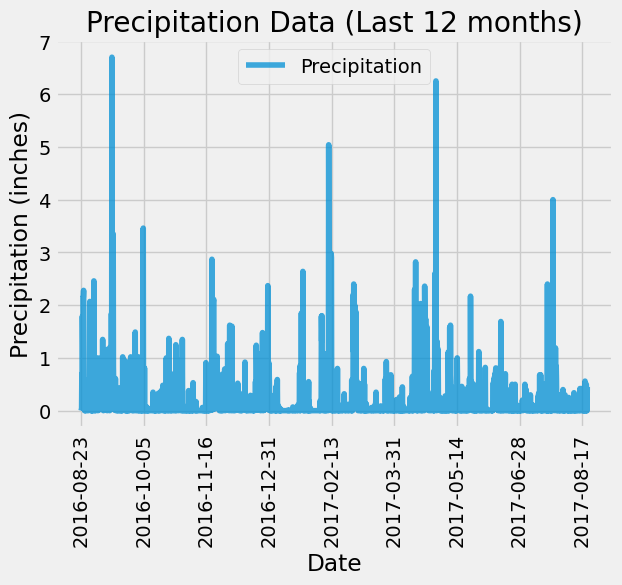

In [154]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
latest_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year = dt.date(latest_date.year - 1, latest_date.month, latest_date.day)
one_year
# # Perform a query to retrieve the data and precipitation scores
sel = [Measurements.date, Measurements.prcp]
results = session.query(*sel).filter(Measurements.date >= one_year).all()
results
# # Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(results, columns = ['Date','Precipitation'])

#drop any null values
precip_df = precip_df.dropna(how= "any")

# # Sort the dataframe by date
precip_df = precip_df.sort_values(["Date"], ascending = True)
precip_df = precip_df.set_index("Date")
precip_df

# # Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot = 90, alpha = 0.75)
plt.title("Precipitation Data (Last 12 months)")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")


In [155]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [93]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Stations).distinct().count()
station_count

9

In [138]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_activity = [Measurements.station, func.count(Measurements.station)]
station_data = session.query(*station_activity).\
    group_by(Measurements.station).\
        group_by(Measurements.station).\
        order_by(desc(func.count(Measurements.station))).all()

# List the stations and their counts in descending order.
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [146]:
#List the station ID that has the most activity
most_active = session.query(Stations.name).filter(Stations.station == 'USC00519281').all()
most_active

[('WAIHEE 837.5, HI US',)]

In [130]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = [func.min(Measurements.tobs),
          func.max(Measurements.tobs),
          func.avg(Measurements.tobs)]
active_stats = session.query(*active).\
    filter(Measurements.station == 'USC00519281').all()
active_stats

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

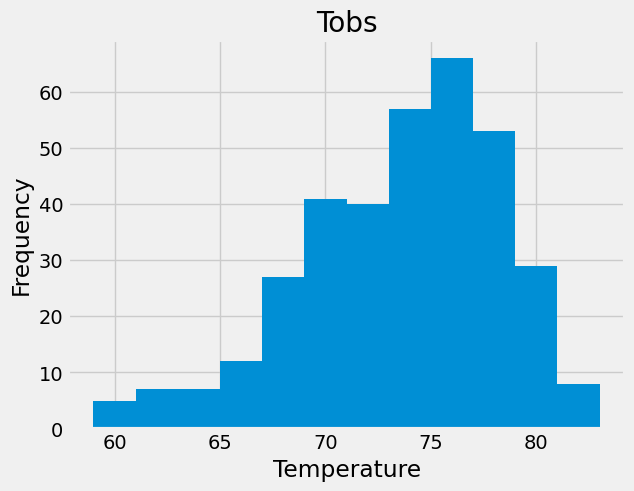

In [174]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#create the query, order by frequency
tobs_stats = session.query(Measurements.tobs).\
    filter(Measurements.date >= one_year, Measurements.station == 'USC00519281').all()
tobs_stats
#put query data into a dataframe
stations_df = pd.DataFrame(tobs_stats, columns=['Tobs'])
stations_df
#create the df histogram plot with 12 bins
stations_df.hist(column='Tobs',bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [175]:
# Close Session
session.close()